# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for model building
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import os

# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")


# Loading the data set
We will be loading the Loan data file using pandas. For this we will be using read_csv file.

In [2]:
housing_df = pd.read_csv("train.csv")

# Basic Data Understanding

In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:

head of the dataset

shape of the dataset

info of the dataset

summary of the dataset

In [3]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Note : head function will display the top records in the data set. By default python shows top 5 records

In [4]:
housing_df.shape

(1460, 81)

Note : Shape function will display dimensions, i.e. loan dataset contains 1460 rows and 81 columns.

In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

 Note : info() is used to check Information about the data and the datatypes of each respective attributes,
        There are 3 float, 35 integer and 43 object datatype columns present.



In [6]:
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Note : The describe method will help to see how data has been spread for the numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values.

# Data Cleaning

1. Check the percentage of missing values
2. Remove all those with very high missing percentage
3. For columns with less missing percentage: perform Imputations
You don’t need to impute the data, you can just identify the correct metric to impute the column.
4. You can drop rows where the missing percentage is quite high


**First calculate the percentage of missing data for each feature:**

In [7]:
missing_fractions = housing_df.isnull().mean().sort_values(ascending=False)

In [8]:
missing_fractions.head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

**observation :** 
According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price
Hence, we will first impute the categorical variables with 'None'

In [9]:
# Replace NA with None in the following columns below : 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    housing_df[col]=housing_df[col].fillna('None')

In [10]:
# Check nulls once again
missing_fraction = housing_df.isnull().mean().sort_values(ascending=False)
missing_fraction.head(20)

LotFrontage     0.177397
GarageYrBlt     0.055479
MasVnrArea      0.005479
Id              0.000000
KitchenAbvGr    0.000000
GarageType      0.000000
FireplaceQu     0.000000
Fireplaces      0.000000
Functional      0.000000
TotRmsAbvGrd    0.000000
KitchenQual     0.000000
BedroomAbvGr    0.000000
GarageCars      0.000000
HalfBath        0.000000
FullBath        0.000000
BsmtHalfBath    0.000000
BsmtFullBath    0.000000
GrLivArea       0.000000
LowQualFinSF    0.000000
2ndFlrSF        0.000000
dtype: float64

In [11]:
dups = housing_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

housing_df[dups]

Number of duplicate rows = 0


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


observation : there are no duplicate records in the data set

**Separating the Numerical and Categorical features for analysis :**

In [12]:
numeric_df = housing_df.select_dtypes(include=['int64', 'float64'])
categorical_df = housing_df.select_dtypes(include=['object'])

# Analyzing Numerical Data

In [13]:
# Numerical features in the dataframe
numeric_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

**Outlier treatment**

Checking percentage of outliers for all the numerical columns.

In [14]:
outliers_percentage={}

for feature in numeric_df.columns:
    IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
    outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
30,EnclosedPorch,14.25
10,BsmtFinSF2,11.44
5,OverallCond,8.56
32,ScreenPorch,7.95
1,MSSubClass,7.05
8,MasVnrArea,6.58
2,LotFrontage,6.03
18,BsmtHalfBath,5.62
29,OpenPorchSF,5.27
3,LotArea,4.73


**observation :**
- Many numerical features have outliers, dropping all outliers may lead to loss of information.
- Hence reassigning fixed minimum and maximum values to those rows where feature value is outside the range of [25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR]
- IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.
- Target column 'SalePrice' is excluded in this

In [15]:
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = housing_df[feature].quantile(.75) - housing_df[feature].quantile(.25) 
        max_value = housing_df[feature].quantile(.75)+1.5*IQR
        min_value = housing_df[feature].quantile(.25)-1.5*IQR
        housing_df[feature][housing_df[feature] > max_value] = max_value
        housing_df[feature][housing_df[feature] < min_value ] = min_value

**Checking the dataset after reassigning minmum and maximum values :**

In [16]:
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,730.500000,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,...,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890
std,421.610009,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,...,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883
min,1.000000,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,1460.000000,145.000000,111.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1780.625000,...,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


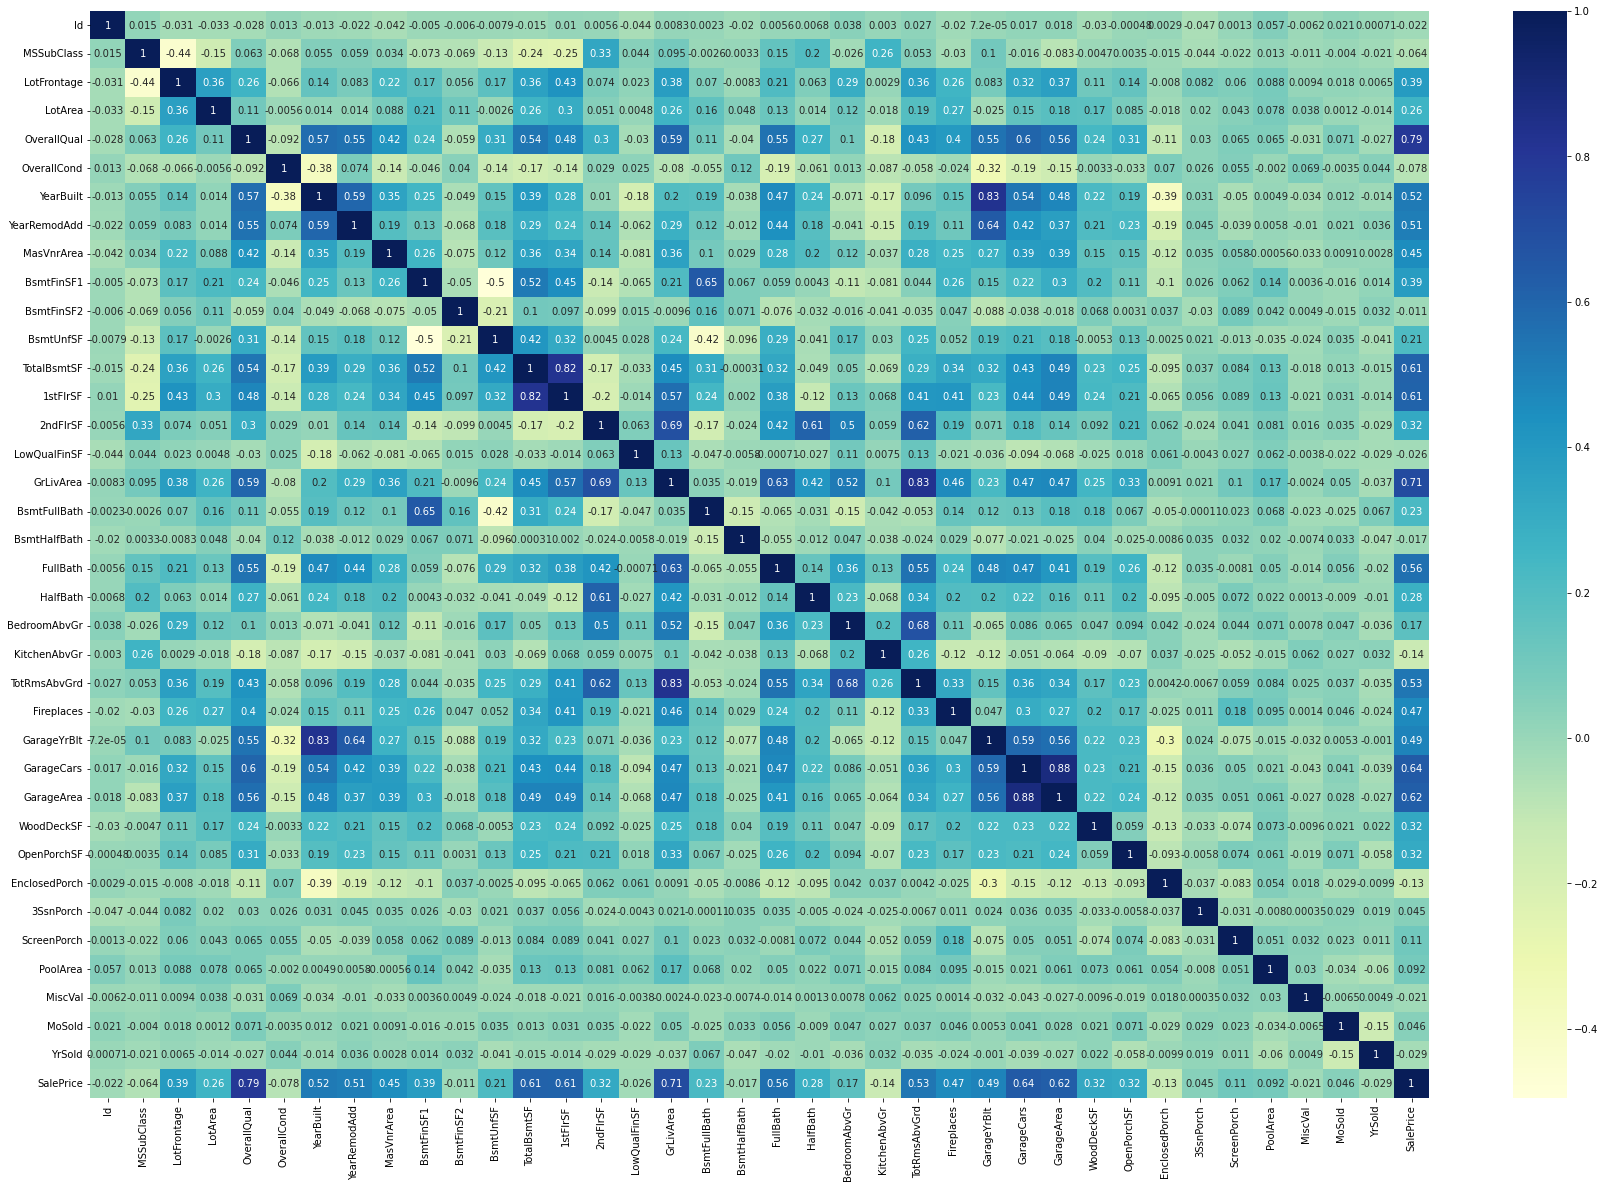

In [17]:
# checking correlations in numeric data

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(numeric_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

**Some of the features have high correlation with each other**
- GarageCars and GarageArea (0.88)
- GarageYrBlt and YearBuilt (0.83)
- TotRmsAbvGrd and GrLivArea (0.83)
- TotalBsmtSF and 1stflrSF (0.82)

One feature from each of these pair will be dropped after data visualization.

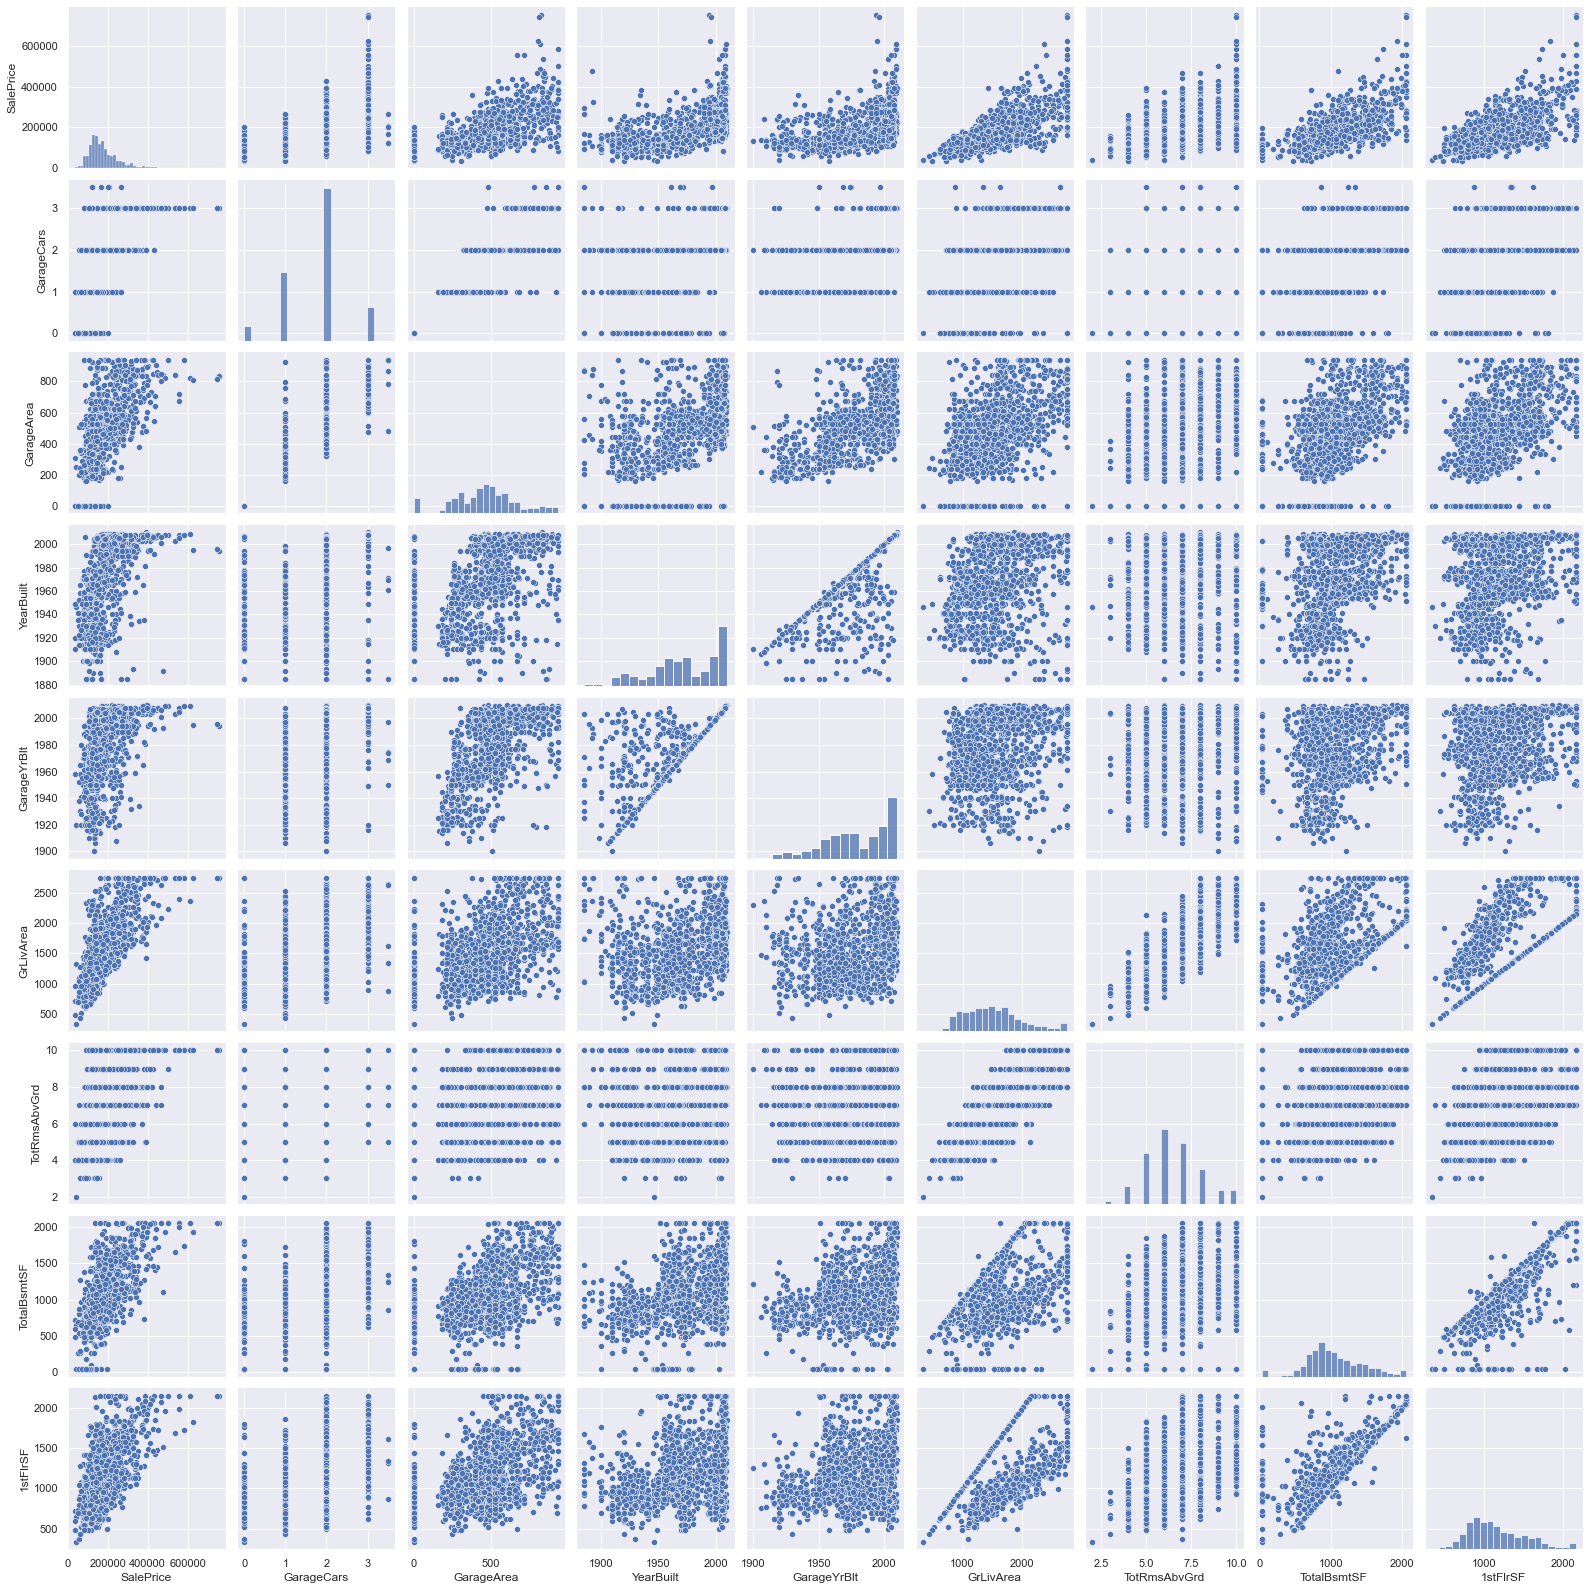

In [18]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GarageCars', 'GarageArea', 'YearBuilt', 'GarageYrBlt', 'GrLivArea','TotRmsAbvGrd','TotalBsmtSF', '1stFlrSF']
sns.pairplot(housing_df[cols], size = 2.5)
plt.show()

**Drop columns that are correlated and not contributing to 'SalePrice' :**

In [19]:
housing_df = housing_df.drop(['GarageCars'], axis = 1)
housing_df = housing_df.drop(['GrLivArea'], axis = 1)
housing_df = housing_df.drop(['GarageYrBlt'], axis = 1)    
housing_df = housing_df.drop(['TotalBsmtSF'], axis = 1) 

housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


# Univariate and Bivariate Analysis - Numerical Features

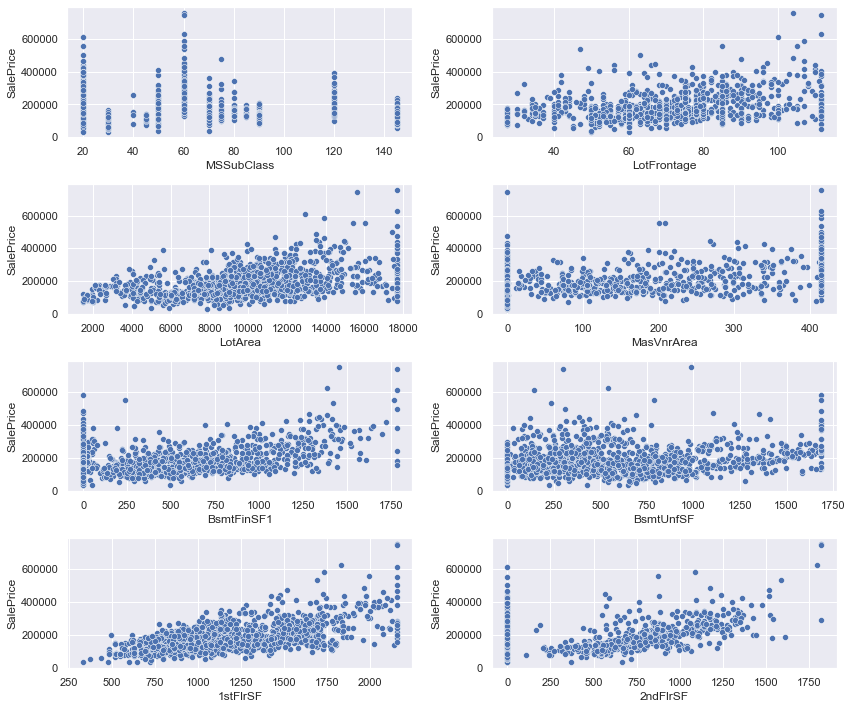

In [20]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF']):
    plt.subplot(5, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(housing_df[feature], housing_df['SalePrice'])
    plt.tight_layout()

observation :
- Features like 'LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF' are showing positive correlation with SalePrice.
- 'MSSubClass' has discrete values

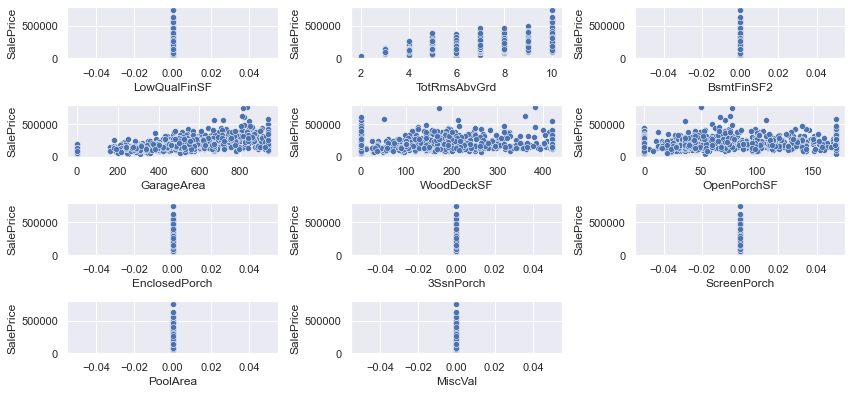

In [21]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['LowQualFinSF', 'TotRmsAbvGrd', 'BsmtFinSF2', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(housing_df[feature], housing_df['SalePrice'])
    plt.tight_layout()

Observation : 
-  'GarageArea' is showing positive correlation with SalePrice.
- 'LowQualFinSF','EnclosedPorch', 'BsmtFinSF2', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal' features have single values and can be dropped.

**Removing these features having fixed values as they won't contribute in predicting SalePrice :**

In [22]:
housing_df[['LowQualFinSF', 'EnclosedPorch','BsmtFinSF2', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

,LowQualFinSF,EnclosedPorch,BsmtFinSF2,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
housing_df.drop(['LowQualFinSF', 'EnclosedPorch', 'BsmtFinSF2', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

# Checking the remaining columns
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold',
       'YrSold', '

**Visualizing the distribution of the numeric features :**

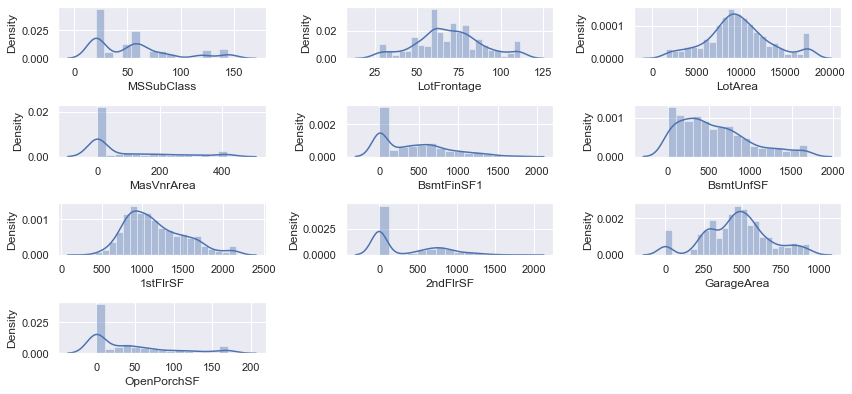

In [24]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF', '1stFlrSF', '2ndFlrSF','GarageArea', 'OpenPorchSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(housing_df[feature])
    plt.tight_layout()

**Analyzing Numerical Features with Discrete Values :**

In [25]:
housing_df[['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'YearBuilt', 'YearRemodAdd' ]]

,OverallQual,OverallCond,MoSold,YrSold,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,YearBuilt,YearRemodAdd
0,7,5.0,2,2008,1.0,0,2,1,3.0,1,8,0.0,2003,2003
1,6,7.5,5,2007,0.0,0,2,0,3.0,1,6,1.0,1976,1976
2,7,5.0,9,2008,1.0,0,2,1,3.0,1,6,1.0,2001,2002
3,7,5.0,2,2006,1.0,0,1,0,3.0,1,7,1.0,1915,1970
4,8,5.0,12,2008,1.0,0,2,1,4.0,1,9,1.0,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5.0,8,2007,0.0,0,2,1,3.0,1,7,1.0,1999,2000
1456,6,6.0,2,2010,1.0,0,2,0,3.0,1,7,2.0,1978,1988
1457,7,7.5,5,2010,0.0,0,2,0,4.0,1,9,2.0,1941,2006
1458,5,6.0,4,2010,1.0,0,1,0,2.0,1,5,0.0,1950,1996


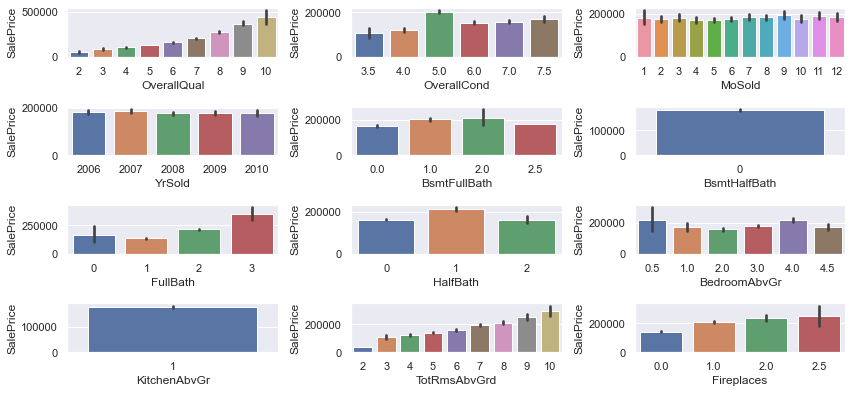

In [26]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold', 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(housing_df[feature], housing_df['SalePrice'])
    plt.tight_layout()

**Observations :**
    
- 'OverallQual' : More the rating of this feature, more the SalePrice (target variable)

- 'OverallCond' : SalePrice is highest for rating 5

- 'MoSold' and 'YrSold': SalePrice does not show a strong trend depending on month and year on which realty is sold

- 'FullBath' = 3 and 'HalfBath' = 1 have highest SalePrice

- 'TotRmsAbvGrd' : More the number of total rooms above grade more the Sale Price

- 'BsmtFullBath', 'KitchenAbvGr' : Need further inspection for meaningful insight.

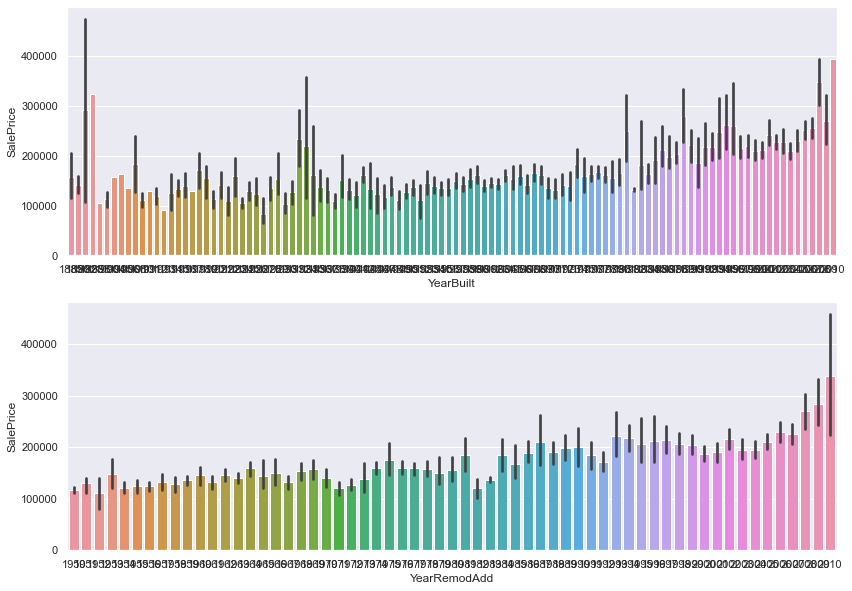

In [27]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['YearBuilt','YearRemodAdd']):
    plt.subplot(3, 1, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(housing_df[feature], housing_df['SalePrice'])
    plt.tight_layout()

observation ; 'YearBuilt','YearRemodAdd' : Will extract new features from to identify any trend


In [28]:
housing_df[['BsmtFullBath', 'KitchenAbvGr','YearBuilt','YearRemodAdd', 'YrSold']].describe()

,BsmtFullBath,KitchenAbvGr,YearBuilt,YearRemodAdd,YrSold
count,1460.000000,1460.0,1460.000000,1460.000000,1460.000000
mean,0.425000,1.0,1971.299315,1984.865753,2007.815753
std,0.517373,0.0,30.108397,20.645407,1.328095
min,0.000000,1.0,1885.000000,1950.000000,2006.000000
25%,0.000000,1.0,1954.000000,1967.000000,2007.000000
50%,0.000000,1.0,1973.000000,1994.000000,2008.000000
75%,1.000000,1.0,2000.000000,2004.000000,2009.000000
max,2.500000,1.0,2010.000000,2010.000000,2010.000000


In [29]:
print(housing_df['BsmtFullBath'].value_counts())
print(housing_df['KitchenAbvGr'].value_counts())

0.0    856
1.0    588
2.0     15
2.5      1
Name: BsmtFullBath, dtype: int64
1    1460
Name: KitchenAbvGr, dtype: int64


In [30]:
# dropping KitchenAbvGr for not having useful information
housing_df.drop(['KitchenAbvGr'], axis=1, inplace=True)

In [31]:
# Converting the year related features into number of years

for feature in ['YearBuilt','YearRemodAdd', 'YrSold']:
    housing_df[feature] = 2021 - housing_df[feature]

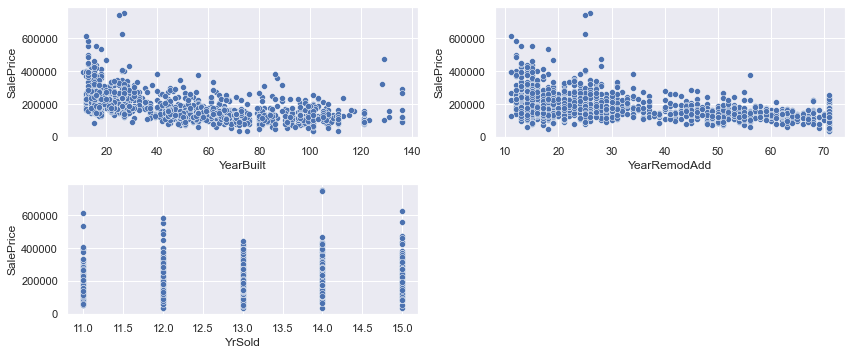

In [32]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(5, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(housing_df[feature], housing_df['SalePrice'])
    plt.tight_layout()

obseration : 
- SalePrice is more for lower value of YearBuilt i.e. more recently build houses
- Recently remodelled houses (lower value of YearRemodAdd) have higher SalePrice
- YrSold still does not show any significant trend

In [33]:
missing_fraction = housing_df.isnull().mean().sort_values(ascending=False)
missing_fraction.head()

LotFrontage     0.177397
MasVnrArea      0.005479
Id              0.000000
Functional      0.000000
TotRmsAbvGrd    0.000000
dtype: float64

observation : Missing Value Imputation to be done for housing_df['LotFrontage'] after splitting data into train and test set to avoid data leakage.

In [34]:
# Since MasVnrArea has only 0.005% data missing, dropping rows with NULL values in MasVnrArea

housing_df = housing_df[~housing_df['MasVnrArea'].isnull()]
housing_df.drop(['Id'], axis=1, inplace=True)
numeric_df.drop(['Id'], axis=1, inplace=True)

Note : id not useful for data analysis, hence we drop id

In [35]:
# Checking the number of remaining columns
housing_df.columns.shape

(68,)

# Analyzing Categorical Features

In [36]:
# Categorical features in the dataframe
categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [37]:
categorical_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [38]:
housing_df.drop(['PoolQC'], axis=1, inplace=True)

In [39]:

# Checking after imputation
print(categorical_df.isnull().sum())

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64


In [40]:
# Function to generate boxplot for SalePrice against different features given the list of features
def generate_boxplot(feature_list):
    fig=plt.subplots(figsize=(20, 16))
    for i, feature in enumerate(feature_list):
        plt.subplot(9, 3, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(housing_df['SalePrice'], housing_df[feature])
        plt.tight_layout()

**Encoding For Categorical Variables Ordered Features** :

-- to be label encoded 'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'CentralAir'

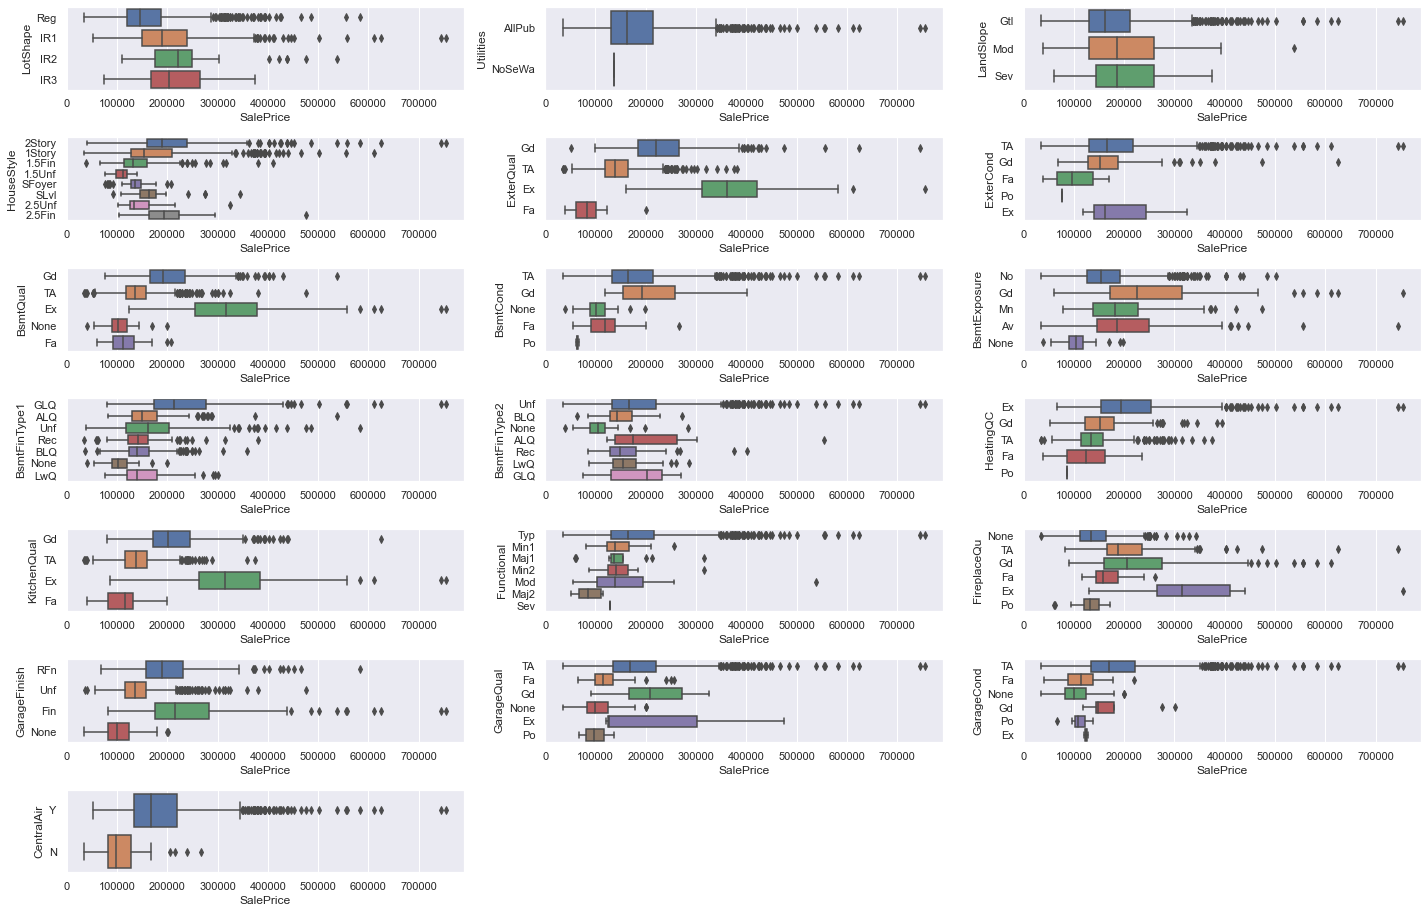

In [41]:
ordered_features = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'CentralAir']

generate_boxplot(ordered_features)

Observation :
- 'LandSlope' : Houses at severe land slope have lowest SalePrice
- 'HouseStyle' : 2 storied houses have the highest SalePrice
- 'ExterQual' : Houses with Excellent quality of material on the exterior have the highest SalePrice
- 'ExterCond' : Houses with Excellent condition of material on the exterior have the highest SalePrice
- 'BsmtQual' : Houses with excellent quality basement have the highest SalePrice

# Data Preparation
- Converting categorical data into numercal data
- Creating Dummie

In [42]:
housing_df['LotShape'] = housing_df['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing_df['Utilities'] = housing_df['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
housing_df['LandSlope'] = housing_df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing_df['HouseStyle'] = housing_df['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
housing_df['ExterQual'] = housing_df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['ExterCond'] = housing_df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['BsmtQual'] = housing_df['BsmtQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtCond'] = housing_df['BsmtCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].map({'None':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['HeatingQC'] = housing_df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['CentralAir'] = housing_df['CentralAir'].map({'N':0,'Y':1})
housing_df['KitchenQual'] = housing_df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['GarageFinish'] = housing_df['GarageFinish'].map({'None':0,'Unf':1,'RFn':2,'Fin':3})
housing_df['GarageQual'] = housing_df['GarageQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['GarageCond'] = housing_df['GarageCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['Functional'] = housing_df['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [43]:
# Checking the features after encoding

housing_df[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
'KitchenQual','Functional','FireplaceQu', 'GarageFinish','GarageQual','GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1452 non-null   int64
 1   Utilities     1452 non-null   int64
 2   LandSlope     1452 non-null   int64
 3   HouseStyle    1452 non-null   int64
 4   ExterQual     1452 non-null   int64
 5   ExterCond     1452 non-null   int64
 6   BsmtQual      1452 non-null   int64
 7   BsmtCond      1452 non-null   int64
 8   BsmtExposure  1452 non-null   int64
 9   BsmtFinType1  1452 non-null   int64
 10  BsmtFinType2  1452 non-null   int64
 11  HeatingQC     1452 non-null   int64
 12  KitchenQual   1452 non-null   int64
 13  Functional    1452 non-null   int64
 14  FireplaceQu   1452 non-null   int64
 15  GarageFinish  1452 non-null   int64
 16  GarageQual    1452 non-null   int64
 17  GarageCond    1452 non-null   int64
dtypes: int64(18)
memory usage: 215.5 KB


**Unordered Features -- to be one hot encoded :**

 'MSZoning', 'Street', 'Alley', 'PoolQC', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition'

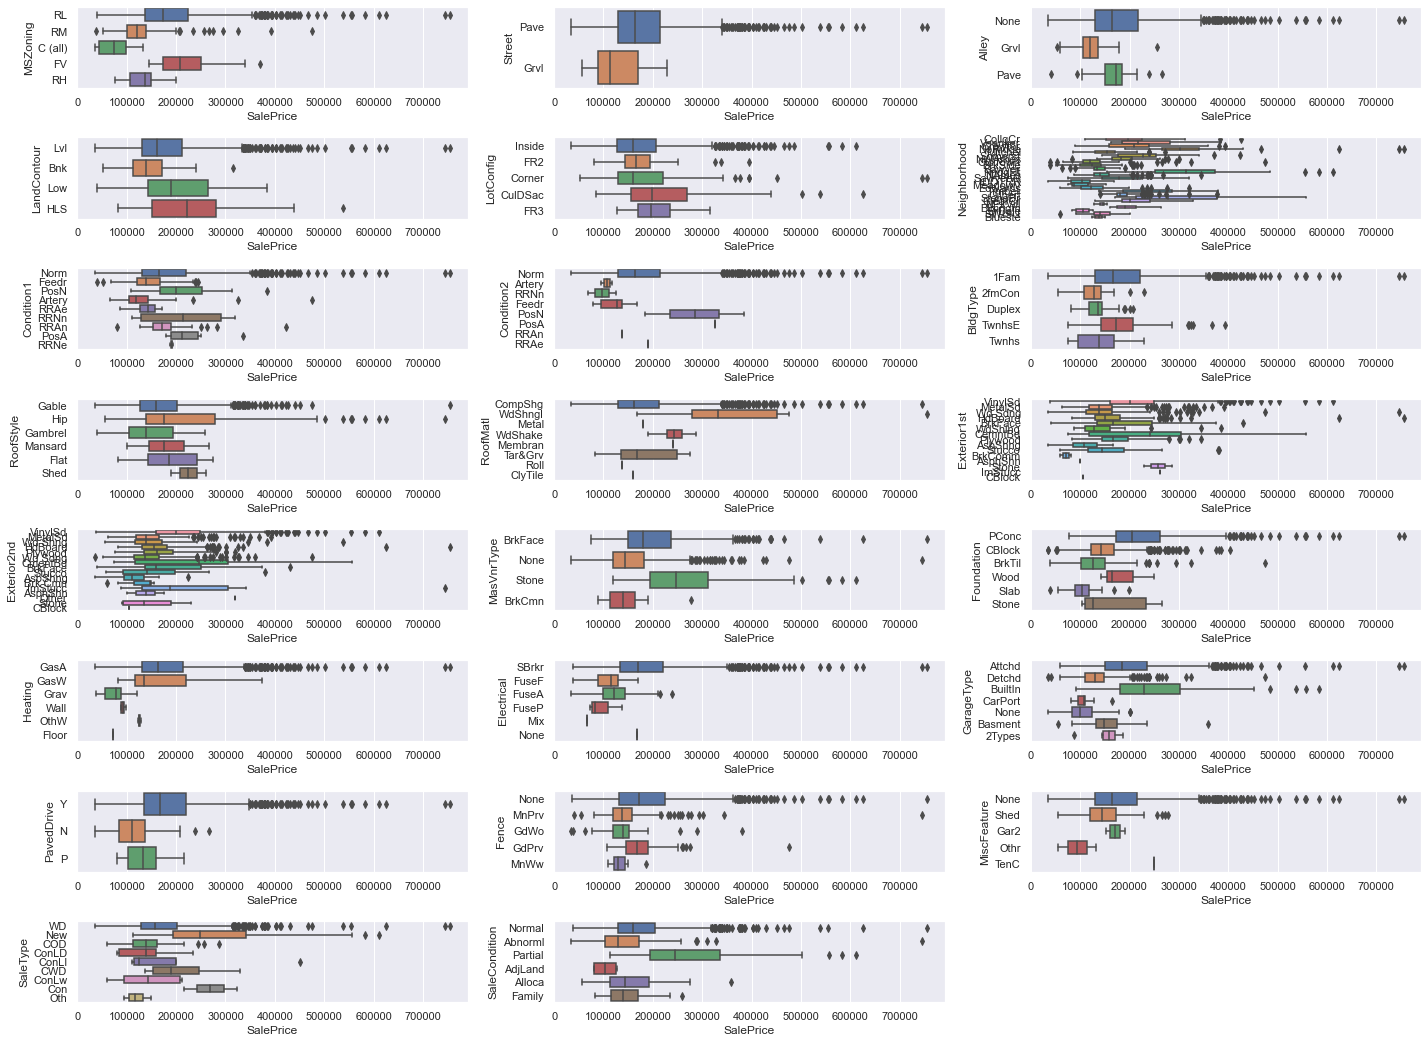

In [44]:
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']

generate_boxplot(unordered_features)

**Encoding Categorical Variables**

In [45]:
dummy_df = pd.get_dummies(housing_df[unordered_features], drop_first=True)

In [46]:
dummy_df.shape

(1452, 145)

- Adding 145 features to the existing dataset will make the model very complex.
- From the above boxplots, for some categorical features only label is dominating over others.
- In dummy_df any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced.

In [47]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',

In [48]:
# Dropping the highly imbalanced dummy variables

dummy_df = dummy_df.drop(dummies_to_drop, axis=1)

print(dummy_df.shape)

(1452, 52)


In [49]:
housing_df.shape

(1452, 67)

In [50]:
# Adding the dummy variables to the original dataframe
housing_df = pd.concat([housing_df,dummy_df],axis=1)

# Dropping the redundant columns
housing_df = housing_df.drop(unordered_features,axis=1)

In [51]:
housing_df.shape

(1452, 96)

In [52]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 96 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             1452 non-null   int64  
 1   LotFrontage            1195 non-null   float64
 2   LotArea                1452 non-null   float64
 3   LotShape               1452 non-null   int64  
 4   Utilities              1452 non-null   int64  
 5   LandSlope              1452 non-null   int64  
 6   HouseStyle             1452 non-null   int64  
 7   OverallQual            1452 non-null   int64  
 8   OverallCond            1452 non-null   float64
 9   YearBuilt              1452 non-null   int64  
 10  YearRemodAdd           1452 non-null   int64  
 11  MasVnrArea             1452 non-null   float64
 12  ExterQual              1452 non-null   int64  
 13  ExterCond              1452 non-null   int64  
 14  BsmtQual               1452 non-null   int64  
 15  Bsmt

In [53]:
##Creating a copy of this dataframe for 'Question 3'
df_new1 = housing_df.copy()

# Splitting into Train and Test Data

In [54]:
X = housing_df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageType_Detchd,GarageType_None,PavedDrive_Y,Fence_MnPrv,Fence_None,MiscFeature_None,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,3,3,0,3,7,5.0,18,...,0,0,1,0,1,1,0,1,1,0
1,20,80.0,9600.0,3,3,0,0,6,7.5,45,...,0,0,1,0,1,1,0,1,1,0
2,60,68.0,11250.0,0,3,0,3,7,5.0,20,...,0,0,1,0,1,1,0,1,1,0
3,70,60.0,9550.0,0,3,0,3,7,5.0,106,...,1,0,1,0,1,1,0,1,0,0
4,60,84.0,14260.0,0,3,0,3,8,5.0,21,...,0,0,1,0,1,1,0,1,1,0


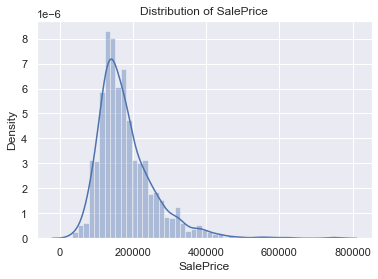

In [55]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(housing_df['SalePrice'])
plt.show()

observation :  Since SalePrice is highly right skewed, checking the distribution of transformed SalePrice.

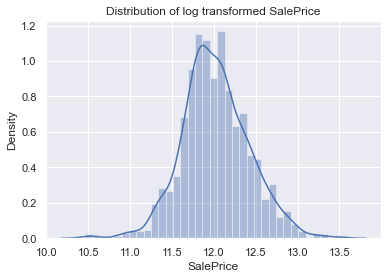

In [56]:
sns.distplot(np.log(housing_df['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [57]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building

y = np.log(housing_df['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1452, dtype: float64


In [58]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1016, 95)
(436, 95)
(1016,)
(436,)


In [60]:
X['LotFrontage'].isnull().any()

True

In [61]:
# Imputing missing value of LotFrontage after splitting training and test set to prevent data leakage.

si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [62]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

**Scaling the features**

In [63]:
X_train.values

array([[2.00000000e+01, 1.10000000e+02, 1.42300000e+04, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.00000000e+01, 1.05000000e+02, 8.47000000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.00000000e+01, 5.90000000e+01, 5.31000000e+03, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [1.20000000e+02, 6.89886905e+01, 5.27100000e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.00000000e+01, 6.00000000e+01, 1.04400000e+04, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.00000000e+01, 7.00000000e+01, 8.40000000e+03, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [64]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [65]:
X_tr_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

In [66]:
# Checking the features after 

print(X_tr_scaled) # train data
print(X_te_scaled) # test data

      MSSubClass   LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0      -0.945760  2.281676e+00  1.287344  0.729819   0.031388  -0.218149   
1      -0.151962  2.003500e+00 -0.309511 -1.421524   0.031388  -0.218149   
2      -0.151962 -5.557237e-01 -1.185563  0.729819   0.031388  -0.218149   
3      -0.945760 -3.331825e-01 -0.301194  0.729819   0.031388  -0.218149   
4       0.112637  7.906250e-16 -0.422344  0.729819   0.031388  -0.218149   
...          ...           ...       ...       ...        ...        ...   
1011   -0.945760  1.224606e+00  0.745079 -1.421524   0.031388  -0.218149   
1012   -0.945760 -5.500608e-02  2.241991 -1.421524   0.031388  -0.218149   
1013    1.700233  7.906250e-16 -1.196375 -1.421524   0.031388   3.475835   
1014   -0.151962 -5.000884e-01  0.236636  0.729819   0.031388  -0.218149   
1015    0.112637  5.626450e-02 -0.328917  0.729819   0.031388  -0.218149   

      HouseStyle  OverallQual  OverallCond  YearBuilt  ...  GarageType_Detchd  \
0     

**Recursive feature elimination (RFE)**

In [67]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_tr_scaled, y_train)

# running RFE
rfe = RFE(lm, step=50)            
rfe = rfe.fit(X_tr_scaled, y_train)

In [68]:
# Assign the columns selected by RFE to cols

col = X_tr_scaled.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotFrontage,True,1
2,LotArea,True,1
3,OverallQual,True,1
4,OverallCond,True,1
5,YearBuilt,True,1
6,YearRemodAdd,True,1
7,BsmtExposure,True,1
8,BsmtFinSF1,True,1
9,BsmtUnfSF,True,1


In [69]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_tr_scaled[col]
X_test_rfe = X_te_scaled[col]

In [70]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test_rfe[X_train.columns]

In [71]:
col = X_te_scaled.columns[rfe.support_]
col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'KitchenQual', 'Functional', 'Fireplaces',
       'GarageArea', 'GarageQual', 'GarageCond', 'MSZoning_RL',
       'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Condition1_Norm',
       'Condition2_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_VinylSd',
       'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Detchd',
       'GarageType_None', 'Fence_None', 'SaleType_New', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object')

# Model Building and Evaluation

**Ridge**

In [72]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [73]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
22,20,-0.081046,-0.085119,1
21,10.0,-0.080879,-0.085247,2
20,9.0,-0.080866,-0.085272,3
19,8.0,-0.080855,-0.085304,4
18,7.0,-0.080845,-0.085342,5
17,6.0,-0.080837,-0.085389,6
16,5.0,-0.080831,-0.085445,7
23,50,-0.081899,-0.085479,8
15,4.0,-0.080826,-0.085510,9
14,3.0,-0.080825,-0.085589,10


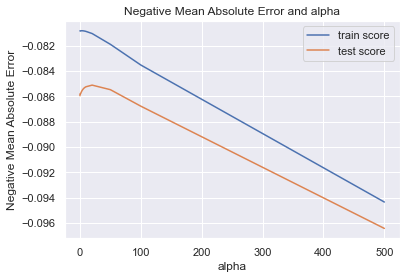

In [74]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [75]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=20)

In [76]:
# check the coefficient values with lambda = 20

alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.00304625,  0.01072255,  0.03270071,  0.08312915,  0.04667016,
       -0.04147217, -0.01420245,  0.01524135,  0.04738811,  0.02475032,
        0.01304853,  0.10794495,  0.095544  ,  0.02645179,  0.        ,
        0.01381562,  0.01997854,  0.01849567, -0.02462142,  0.0233035 ,
        0.0227544 ,  0.01267814,  0.01373597,  0.02759341, -0.01545207,
       -0.01086917, -0.01125504, -0.00883054,  0.02012664,  0.01797723,
        0.0129141 , -0.0091302 , -0.00133055, -0.0157131 , -0.00979244,
        0.01861084, -0.01478008,  0.00240582, -0.02150182,  0.02046827,
        0.01126346,  0.00874642,  0.01783599,  0.00318926,  0.04316496,
        0.02037348, -0.01733756])

In [77]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)


##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)


print("For Ridge Regression Model (Original Model, alpha=20.0):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,
      "\nRMSE score:",RMSE_ridge_test,"\n","*"*40)

For Ridge Regression Model (Original Model, alpha=20.0):
 ****************************************

For Train Set:
R2 score: 0.9095845557697912 
MSE score: 0.013892562392204679 
RMSE score: 0.11786671452197468

For Test Set:
R2 score: 0.88965574911748 
MSE score: 0.019059495341107686 
RMSE score: 0.1380561311246541 
 ****************************************


In [78]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0030
1,LotFrontage,0.0107
2,LotArea,0.0327
3,OverallQual,0.0831
4,OverallCond,0.0467
5,YearBuilt,-0.0415
6,YearRemodAdd,-0.0142
7,BsmtExposure,0.0152
8,BsmtFinSF1,0.0474
9,BsmtUnfSF,0.0248


In [79]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.003,
 'LotFrontage': 0.0107,
 'LotArea': 0.0327,
 'OverallQual': 0.0831,
 'OverallCond': 0.0467,
 'YearBuilt': -0.0415,
 'YearRemodAdd': -0.0142,
 'BsmtExposure': 0.0152,
 'BsmtFinSF1': 0.0474,
 'BsmtUnfSF': 0.0248,
 'CentralAir': 0.013,
 '1stFlrSF': 0.1079,
 '2ndFlrSF': 0.0955,
 'BsmtFullBath': 0.0265,
 'BsmtHalfBath': 0.0,
 'FullBath': 0.0138,
 'HalfBath': 0.02,
 'KitchenQual': 0.0185,
 'Functional': -0.0246,
 'Fireplaces': 0.0233,
 'GarageArea': 0.0228,
 'GarageQual': 0.0127,
 'GarageCond': 0.0137,
 'MSZoning_RL': 0.0276,
 'Neighborhood_Edwards': -0.0155,
 'Neighborhood_NAmes': -0.0109,
 'Neighborhood_NWAmes': -0.0113,
 'Neighborhood_Sawyer': -0.0088,
 'Neighborhood_Somerst': 0.0201,
 'Condition1_Norm': 0.018,
 'Condition2_Norm': 0.0129,
 'RoofStyle_Gable': -0.0091,
 'RoofStyle_Hip': -0.0013,
 'Exterior1st_HdBoard': -0.0157,
 'Exterior1st_Plywood': -0.0098,
 'Exterior1st_VinylSd': 0.0186,
 'Exterior1st_Wd Sdng': -0.0148,
 'Exterior2nd_HdBoard': 0.0024,
 'Exterior2n

**RFE**

In [80]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, step=15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [81]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
6,1stFlrSF,True,1,0.1079
7,2ndFlrSF,True,1,0.0955
1,OverallQual,True,1,0.0831
4,BsmtFinSF1,True,1,0.0474
2,OverallCond,True,1,0.0467
20,SaleType_New,True,1,0.0432
0,LotArea,True,1,0.0327
14,MSZoning_RL,True,1,0.0276
8,BsmtFullBath,True,1,0.0265
5,BsmtUnfSF,True,1,0.0248


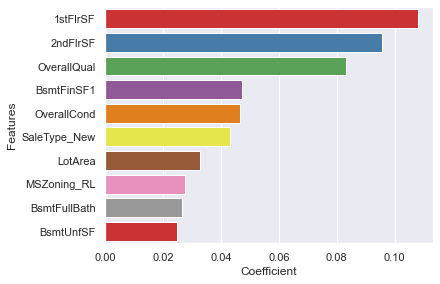

In [82]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

The above graph displays the top 10 variables based on the Ridge Regression model that are significant in predicting the price of a house.

**Lasso**

In [83]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [84]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
5,0.001,-0.080886,-0.084698,1
6,0.002,-0.081150,-0.084721,2
7,0.003,-0.081593,-0.085126,3
4,0.0005,-0.080638,-0.085161,4
3,0.0004,-0.080635,-0.085311,5
2,0.0003,-0.080656,-0.085461,6
1,0.0002,-0.080692,-0.085619,7
8,0.004,-0.082184,-0.085678,8
0,0.0001,-0.080755,-0.085778,9
9,0.005,-0.082925,-0.086337,10


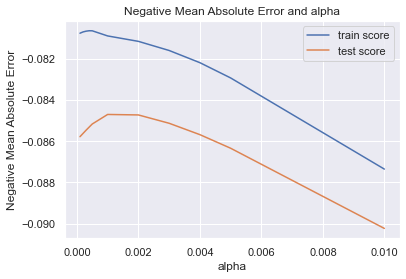

In [85]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [86]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.001)

In [87]:
# check the coefficient values with lambda = 0.001

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.00248448,  0.00817698,  0.03140608,  0.08671091,  0.04727832,
       -0.04596355, -0.01312562,  0.01399879,  0.04638837,  0.02117655,
        0.0118609 ,  0.11656051,  0.1027612 ,  0.02464205,  0.        ,
        0.00802651,  0.01544457,  0.01700504, -0.0248756 ,  0.02154858,
        0.02121033,  0.00482346,  0.00580444,  0.02693027, -0.01438897,
       -0.00792945, -0.00922891, -0.00683785,  0.01982463,  0.01837444,
        0.01158664, -0.00539968,  0.        , -0.01161897, -0.00825286,
        0.        , -0.01306599,  0.        , -0.00079995,  0.02076371,
        0.00653483,  0.00312698,  0.        ,  0.00239529,  0.02695456,
        0.02096859, -0.        ])

In [88]:
##Making predictions for train and test sets: Lasso Regression Model
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)


##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model (Original Model: alpha=0.001):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lasso Regression Model (Original Model: alpha=0.001):
 ****************************************

For Train Set:
R2 score: 0.9086550397956248 
MSE score: 0.014035384879840533 
RMSE score: 0.11847102970701544

For Test Set:
R2 score: 0.8923743363811389 
MSE score: 0.018589920344026355 
RMSE score: 0.1363448581503034 
 ****************************************


In [89]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0025
1,LotFrontage,0.0082
2,LotArea,0.0314
3,OverallQual,0.0867
4,OverallCond,0.0473
5,YearBuilt,-0.0460
6,YearRemodAdd,-0.0131
7,BsmtExposure,0.0140
8,BsmtFinSF1,0.0464
9,BsmtUnfSF,0.0212


In [90]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.002484476579894203,
 'LotFrontage': 0.008176983460921685,
 'LotArea': 0.031406078195719035,
 'OverallQual': 0.08671090884125236,
 'OverallCond': 0.047278319698480294,
 'YearBuilt': -0.04596355334602574,
 'YearRemodAdd': -0.013125622103539594,
 'BsmtExposure': 0.013998785741888961,
 'BsmtFinSF1': 0.046388368688837396,
 'BsmtUnfSF': 0.02117654587603712,
 'CentralAir': 0.011860897882849955,
 '1stFlrSF': 0.11656050997600745,
 '2ndFlrSF': 0.10276120234844843,
 'BsmtFullBath': 0.024642053448702593,
 'BsmtHalfBath': 0.0,
 'FullBath': 0.00802650870645557,
 'HalfBath': 0.015444570473362909,
 'KitchenQual': 0.017005043534941446,
 'Functional': -0.02487559675382716,
 'Fireplaces': 0.021548575385814672,
 'GarageArea': 0.021210328046099552,
 'GarageQual': 0.004823460317591202,
 'GarageCond': 0.005804438103926855,
 'MSZoning_RL': 0.02693027471515472,
 'Neighborhood_Edwards': -0.014388970980299688,
 'Neighborhood_NAmes': -0.007929449362667622,
 'Neighborhood_NWAmes': -0.009228910772

**RFE**

In [91]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, step=15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [92]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
7,1stFlrSF,True,1,0.116561
8,2ndFlrSF,True,1,0.102761
1,OverallQual,True,1,0.086711
2,OverallCond,True,1,0.047278
5,BsmtFinSF1,True,1,0.046388
0,LotArea,True,1,0.031406
18,SaleType_New,True,1,0.026955
14,MSZoning_RL,True,1,0.026930
9,BsmtFullBath,True,1,0.024642
12,Fireplaces,True,1,0.021549


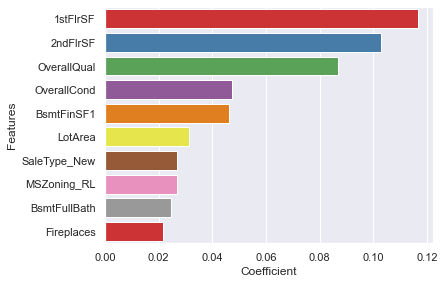

In [93]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price of a house.

# Conclusions

the optimal lambda value in case of Ridge and Lasso is as below:

Ridge - 20
Lasso - 0.001

The Mean Squared error in case of Ridge and Lasso are:

Ridge - 0.019059
Lasso - 0.018589

Hence based on Ridge and Lasso, the factors that generally affect the price are the Zoning classification, First Floor square feet, Overall quality and condition of the house,Lot size in square feet,  second Floor square feet
, Foundation type of the house, Number of cars that can be accomodated in the garage and the Basement finished square feet area

Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.

**Surprise Housing is to keep a check on these predictors affecting the price of the house**
- When the market value of the property is lower than the Predicted Sale Price, its the time to buy.

# Subjective Questions:

**Question 1**

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [94]:
##Optimal Value of alpha for ridge and lasso regression (importing values already computed)

optimal_alpha_ridge = 20.0        #(Computed Above: For Ridge Regression)
optimal_alpha_lasso = 0.001    #(Computed Above: For Lasso Regression)

chek the Changes to the model when we double the value of alpha for both ridge and lasso regression

In [95]:
# check the coefficient values with lambda = 40

alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.00258345,  0.01150243,  0.03303831,  0.08246562,  0.04449952,
       -0.03693919, -0.01541421,  0.01540928,  0.04701254,  0.02464361,
        0.01347455,  0.10114962,  0.08786915,  0.02629481,  0.        ,
        0.01805148,  0.02234618,  0.02008252, -0.02405521,  0.02458305,
        0.02449887,  0.01141785,  0.01189451,  0.02653517, -0.01513783,
       -0.01005773, -0.0109168 , -0.00875467,  0.01891689,  0.01742127,
        0.0129468 , -0.00789324,  0.00079026, -0.01429463, -0.00936943,
        0.01236664, -0.01463837,  0.00143577, -0.01469084,  0.0208563 ,
        0.00970929,  0.00627586,  0.01353325,  0.00337462,  0.03117857,
        0.01962948, -0.00589876])

In [96]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)


##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)


print("For Ridge Regression Model (Doubled alpha model, alpha=40.0):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,
      "\nRMSE score:",RMSE_ridge_test,"\n","*"*40)

For Ridge Regression Model (Doubled alpha model, alpha=40.0):
 ****************************************

For Train Set:
R2 score: 0.908627543178562 
MSE score: 0.014039609804811825 
RMSE score: 0.11848885941223261

For Test Set:
R2 score: 0.8894585088785547 
MSE score: 0.01909356417011155 
RMSE score: 0.13817946363375258 
 ****************************************


In [97]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0026
1,LotFrontage,0.0115
2,LotArea,0.0330
3,OverallQual,0.0825
4,OverallCond,0.0445
5,YearBuilt,-0.0369
6,YearRemodAdd,-0.0154
7,BsmtExposure,0.0154
8,BsmtFinSF1,0.0470
9,BsmtUnfSF,0.0246


In [98]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, step=15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [99]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp3_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp3_df = temp3_df.loc[temp3_df['rfe_support'] == True]
temp3_df.reset_index(drop=True, inplace=True)

temp3_df['Coefficient'] = temp3_df['Features'].apply(find)
temp3_df = temp3_df.sort_values(by=['Coefficient'], ascending=False)
temp3_df = temp3_df.head(10)
temp3_df

,Features,rfe_support,rfe_ranking,Coefficient
6,1stFlrSF,True,1,0.1079
7,2ndFlrSF,True,1,0.0955
1,OverallQual,True,1,0.0831
4,BsmtFinSF1,True,1,0.0474
2,OverallCond,True,1,0.0467
20,SaleType_New,True,1,0.0432
0,LotArea,True,1,0.0327
14,MSZoning_RL,True,1,0.0276
8,BsmtFullBath,True,1,0.0265
5,BsmtUnfSF,True,1,0.0248


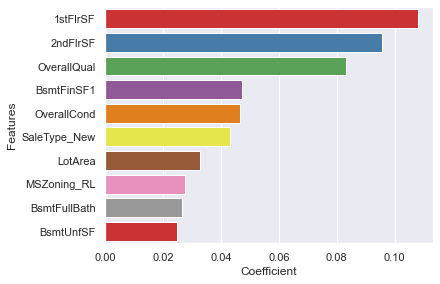

In [100]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp3_df)
plt.show()

**Lasso**

In [101]:

# check the coefficient values with lambda = 0.002

alpha = 0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.00163042,  0.00743722,  0.03176345,  0.08932477,  0.04516458,
       -0.04452225, -0.01403779,  0.01317545,  0.0447239 ,  0.01886605,
        0.01134841,  0.11536415,  0.10009953,  0.02315347,  0.        ,
        0.00777581,  0.01461338,  0.01800537, -0.02442532,  0.02168143,
        0.02301033,  0.00431555,  0.00637707,  0.0246593 , -0.01275236,
       -0.00506508, -0.00754199, -0.00524433,  0.01815104,  0.01765131,
        0.01077156, -0.00422838,  0.        , -0.00950767, -0.00661402,
        0.        , -0.01164726, -0.        ,  0.        ,  0.02180722,
        0.00400824,  0.        , -0.        ,  0.00181882,  0.02521556,
        0.01900608,  0.        ])

In [102]:
##Making predictions for train and test sets: Lasso Regression Model
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)


##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model (Doubled Model: alpha=0.002):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lasso Regression Model (Doubled Model: alpha=0.002):
 ****************************************

For Train Set:
R2 score: 0.9079033108034973 
MSE score: 0.014150889946636094 
RMSE score: 0.11895751319961297

For Test Set:
R2 score: 0.8922700439916927 
MSE score: 0.018607934515991496 
RMSE score: 0.1364109032152177 
 ****************************************


In [103]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0016
1,LotFrontage,0.0074
2,LotArea,0.0318
3,OverallQual,0.0893
4,OverallCond,0.0452
5,YearBuilt,-0.0445
6,YearRemodAdd,-0.0140
7,BsmtExposure,0.0132
8,BsmtFinSF1,0.0447
9,BsmtUnfSF,0.0189


In [104]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, step=15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [105]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp4_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp4_df = temp4_df.loc[temp4_df['rfe_support'] == True]
temp4_df.reset_index(drop=True, inplace=True)

temp4_df['Coefficient'] = temp4_df['Features'].apply(find)
temp4_df = temp4_df.sort_values(by=['Coefficient'], ascending=False)
temp4_df = temp4_df.head(10)
temp4_df

,Features,rfe_support,rfe_ranking,Coefficient
6,1stFlrSF,True,1,0.116561
7,2ndFlrSF,True,1,0.102761
1,OverallQual,True,1,0.086711
2,OverallCond,True,1,0.047278
4,BsmtFinSF1,True,1,0.046388
0,LotArea,True,1,0.031406
17,SaleType_New,True,1,0.026955
13,MSZoning_RL,True,1,0.026930
8,BsmtFullBath,True,1,0.024642
11,Fireplaces,True,1,0.021549


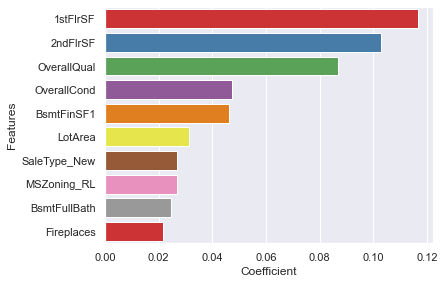

In [106]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

**Question 2**

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

Solution in Subjective Questions pdf File

**Question 3**

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [107]:

df= df_new1

##Removing these top5 features (as per  Lasso Model) from 'df'
df.drop(['1stFlrSF'], axis=1, inplace=True)
df.drop(['OverallQual'], axis=1, inplace=True)
df.drop(['2ndFlrSF'], axis=1, inplace=True)
df.drop(['LotArea'], axis=1, inplace=True)
df.drop(['GarageArea'], axis=1, inplace=True)
df.head()

,MSSubClass,LotFrontage,LotShape,Utilities,LandSlope,HouseStyle,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageType_Detchd,GarageType_None,PavedDrive_Y,Fence_MnPrv,Fence_None,MiscFeature_None,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,3,3,0,3,5.0,18,18,196.0,...,0,0,1,0,1,1,0,1,1,0
1,20,80.0,3,3,0,0,7.5,45,45,0.0,...,0,0,1,0,1,1,0,1,1,0
2,60,68.0,0,3,0,3,5.0,20,19,162.0,...,0,0,1,0,1,1,0,1,1,0
3,70,60.0,0,3,0,3,5.0,106,51,0.0,...,1,0,1,0,1,1,0,1,0,0
4,60,84.0,0,3,0,3,5.0,21,21,350.0,...,0,0,1,0,1,1,0,1,1,0


**Splitting into Train and Test Data**

In [108]:
X = df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotShape,Utilities,LandSlope,HouseStyle,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageType_Detchd,GarageType_None,PavedDrive_Y,Fence_MnPrv,Fence_None,MiscFeature_None,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,3,3,0,3,5.0,18,18,196.0,...,0,0,1,0,1,1,0,1,1,0
1,20,80.0,3,3,0,0,7.5,45,45,0.0,...,0,0,1,0,1,1,0,1,1,0
2,60,68.0,0,3,0,3,5.0,20,19,162.0,...,0,0,1,0,1,1,0,1,1,0
3,70,60.0,0,3,0,3,5.0,106,51,0.0,...,1,0,1,0,1,1,0,1,0,0
4,60,84.0,0,3,0,3,5.0,21,21,350.0,...,0,0,1,0,1,1,0,1,1,0


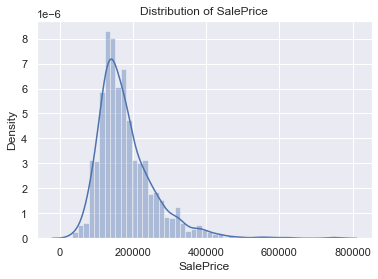

In [109]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(df['SalePrice'])
plt.show()

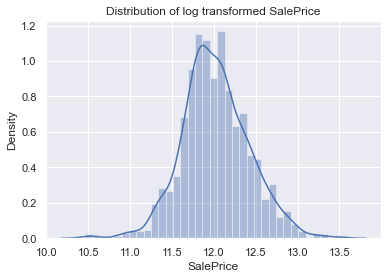

In [110]:
sns.distplot(np.log(df['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [111]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building

y = np.log(df['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1452, dtype: float64


In [112]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

In [113]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1016, 90)
(436, 90)
(1016,)
(436,)


In [114]:
X['LotFrontage'].isnull().any()

True

In [115]:
# Imputing missing value of LotFrontage after splitting training and test set to prevent data leakage.

si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [116]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

Scaling the features

In [117]:
X_train.values

array([[ 20.        , 110.        ,   3.        , ...,   1.        ,
          1.        ,   0.        ],
       [ 50.        , 105.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 50.        ,  59.        ,   3.        , ...,   1.        ,
          1.        ,   0.        ],
       ...,
       [120.        ,  68.98869048,   0.        , ...,   1.        ,
          0.        ,   0.        ],
       [ 50.        ,  60.        ,   3.        , ...,   1.        ,
          1.        ,   0.        ],
       [ 60.        ,  70.        ,   3.        , ...,   1.        ,
          1.        ,   0.        ]])

In [118]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [119]:
X_tra_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_tes_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

In [120]:
# Checking the features after 

print(X_tra_scaled) # train data
print(X_tes_scaled) # test data

      MSSubClass   LotFrontage  LotShape  Utilities  LandSlope  HouseStyle  \
0      -0.945760  2.281676e+00  0.729819   0.031388  -0.218149   -0.858170   
1      -0.151962  2.003500e+00 -1.421524   0.031388  -0.218149    0.168199   
2      -0.151962 -5.557237e-01  0.729819   0.031388  -0.218149    0.168199   
3      -0.945760 -3.331825e-01  0.729819   0.031388  -0.218149   -0.858170   
4       0.112637  7.906250e-16  0.729819   0.031388  -0.218149    0.681384   
...          ...           ...       ...        ...        ...         ...   
1011   -0.945760  1.224606e+00 -1.421524   0.031388  -0.218149   -0.858170   
1012   -0.945760 -5.500608e-02 -1.421524   0.031388  -0.218149   -0.858170   
1013    1.700233  7.906250e-16 -1.421524   0.031388   3.475835   -0.858170   
1014   -0.151962 -5.000884e-01  0.729819   0.031388  -0.218149    0.681384   
1015    0.112637  5.626450e-02  0.729819   0.031388  -0.218149    0.681384   

      OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ...  \


Recursive feature elimination (RFE)

In [121]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_tra_scaled, y_train)

# running RFE
rfe = RFE(lm, step=50)            
rfe = rfe.fit(X_tra_scaled, y_train)

In [122]:
# Assign the columns selected by RFE to cols

col = X_tra_scaled.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp5_df = pd.DataFrame(list(zip(X_tra_scaled.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp5_df = temp5_df.loc[temp5_df['rfe_support'] == True]
temp5_df.reset_index(drop=True, inplace=True)

temp5_df

,Variable,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotFrontage,True,1
2,HouseStyle,True,1
3,OverallCond,True,1
4,YearBuilt,True,1
5,YearRemodAdd,True,1
6,ExterQual,True,1
7,BsmtExposure,True,1
8,BsmtFinSF1,True,1
9,BsmtFinType2,True,1


In [123]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_tra_scaled[col]
X_test_rfe = X_tes_scaled[col]

In [124]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test_rfe[X_train.columns]

In [125]:
col = X_tra_scaled.columns[rfe.support_]
col

Index(['MSSubClass', 'LotFrontage', 'HouseStyle', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'CentralAir', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'MSZoning_RL', 'LotConfig_CulDSac', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Condition1_Norm',
       'RoofStyle_Gable', 'Exterior1st_HdBoard', 'Exterior1st_Plywood',
       'Exterior1st_VinylSd', 'Exterior2nd_HdBoard', 'Exterior2nd_VinylSd',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'Foundation_CBlock', 'GarageType_None', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

**Model Building and Evaluation for Lasso**

In [126]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [127]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
6,0.002,-0.103162,-0.108269,1
7,0.003,-0.103446,-0.108391,2
5,0.001,-0.102950,-0.108467,3
8,0.004,-0.103893,-0.108660,4
4,0.0005,-0.102702,-0.108885,5
3,0.0004,-0.102645,-0.109004,6
9,0.005,-0.104427,-0.109030,7
2,0.0003,-0.102599,-0.109107,8
1,0.0002,-0.102563,-0.109218,9
0,0.0001,-0.102544,-0.109344,10


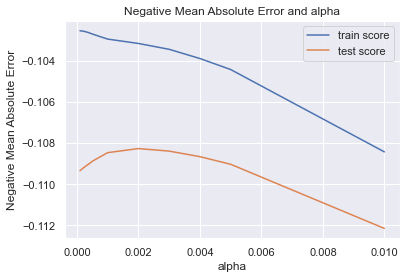

In [128]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [129]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.002)

In [130]:
# check the coefficient values with lambda = 0.002

alpha = 0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.00119622,  0.03781349,  0.00112891,  0.04645365, -0.04457246,
       -0.01558061,  0.03582627,  0.01925984,  0.09804715,  0.01764397,
        0.0731885 ,  0.01388701,  0.02536591,  0.        ,  0.05232024,
        0.04886672,  0.03419228,  0.07135788, -0.0203856 ,  0.04831741,
        0.03459417,  0.        ,  0.01502919,  0.02357858,  0.02061066,
       -0.01993468, -0.01234444, -0.00828602, -0.00884666, -0.01419193,
        0.01965274,  0.01618708, -0.01719212, -0.01191717, -0.00266803,
        0.        , -0.        ,  0.        ,  0.00496823, -0.        ,
        0.00604288, -0.0281766 ,  0.        ,  0.01032236,  0.        ])

In [131]:
##Making predictions for train and test sets: Lasso Regression Model
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)


##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model (Feature dropped lasso Model: alpha=0.002):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lasso Regression Model (Feature dropped lasso Model: alpha=0.002):
 ****************************************

For Train Set:
R2 score: 0.868029716451872 
MSE score: 0.020277568879064938 
RMSE score: 0.1423993289277198

For Test Set:
R2 score: 0.8456000615569789 
MSE score: 0.026669127606432027 
RMSE score: 0.16330685107010062 
 ****************************************


In [132]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0012
1,LotFrontage,0.0378
2,HouseStyle,0.0011
3,OverallCond,0.0465
4,YearBuilt,-0.0446
5,YearRemodAdd,-0.0156
6,ExterQual,0.0358
7,BsmtExposure,0.0193
8,BsmtFinSF1,0.0980
9,BsmtFinType2,0.0176


The five most important predictor variables now :
   - BsmtFinSF1 : Type 1 finished square feet
   - BsmtUnfSF : Unfinished square feet of basement area
   - TotRmsAbvGrd : Total rooms above grade 
   - Fullbath : Full bathrooms above grade
   - Halfbath : Half bathrooms above grade


*Question 4*

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

Solution in the Subjective Questions pdf file